# CS 179: Final Project
## PCA Recommender System 
---
***Group Members | SID***

Erik Gomez | 38017181 <br>
Filip Velasquez | 47444867

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')  # movieId title genres
ratings = pd.read_csv('ml-latest-small/ratings.csv')  # userId movieId rating timestamp
ratings.drop(['timestamp'], axis=1, inplace=True)  # we don't care about timestap so lets get rid of it

In [3]:
# lets further process our data set by merging our tables
data = ratings.merge(movies, on='movieId', how='left')
data.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


We can transform our data into a table where the rows reprsent the userId, and the columns represent the title. 
We can then fill in missing values with 0 to then compute the correlation matrix.

In [4]:
user_title = data.pivot_table(index='userId',columns='title',values='rating')
user_title = user_title.replace(np.nan, 0, regex=True)
user_title.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Let's split into training & test:
# user_title.shape : 610, 9719 (userId, title)
nUsers = user_title.shape[0]
np.random.seed(0)
msk = np.random.rand(len(user_title)) < 0.8

train = user_title[msk]
test = user_title[~msk]

We want to standardize our data so that the mean of observed values is 0 and the standard deviation is 1. We will do this using scikit-learn object StandardScalar. 

In [70]:
# converts to a range between 0 and 1
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train)

With our standardized data, we can create a covariance matrix that represents the covariance between each feature in our data.

In [22]:
cov_matrix = np.cov(scaled_train)

We can then take the eigendecomposition of the covariance matrix to get the principal components.

In [217]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

Plotting the explained variance and cumulative explained variance can help determine K.

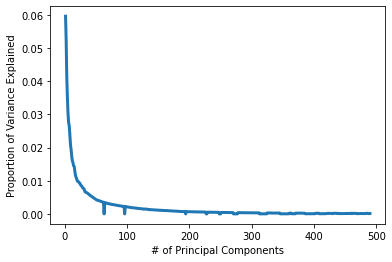

In [229]:
var_explained = []

for i in eigen_values:
    var_explained.append((i/sum(eigen_values)))


plt.plot(range(1,491), var_explained, lw=3)
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('# of Principal Components')

plt.show()

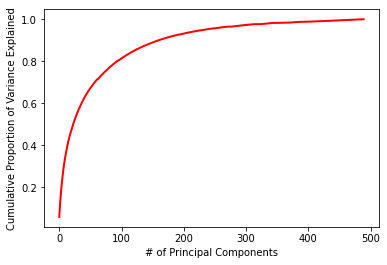

In [248]:
cum_var_explained = np.cumsum(var_explained)

plt.plot(range(490), cum_var_explained, 'r-', lw=2)
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xlabel('# of Principal Components')

plt.show()

Apply the K components to the original standardized data where K is the number of components chosen. We chose K = 200 because it explains about 90% of the variance in the data set.

In [279]:
from scipy.linalg import svd

U, s, V = np.linalg.svd(scaled_train, full_matrices=False)

In [287]:
W = U.dot(np.diag(s))

In [295]:
X0 = W[:,:200].dot(V[:200])

In [299]:
X = scaler.inverse_transform(X0)
X

array([[ 1.39912222e-04,  7.46244764e-04, -4.17657648e-04, ...,
        -3.69322047e-04,  3.97667790e+00,  6.31904536e-05],
       [-3.97055363e-03, -1.39478956e-02, -1.34089762e-02, ...,
        -6.04741652e-04, -5.24060610e-02, -1.02790275e-04],
       [ 1.08908155e-04,  3.29420350e-04,  2.80993384e-04, ...,
        -5.11931623e-04,  1.04639134e-02, -7.45221570e-05],
       ...,
       [ 5.89896623e-05, -1.64974975e-03, -6.80425374e-04, ...,
        -4.17598027e-04,  3.25070816e-03,  8.46480469e-05],
       [-1.51057359e-03,  8.79620878e-03,  4.72737228e-03, ...,
        -3.89653946e-03, -1.70138960e-01,  1.06543575e-03],
       [ 3.99973401e+00,  3.30170747e-04,  3.43606079e-04, ...,
         1.50001496e+00,  7.20660030e-04,  2.68145467e-06]])